The code below trys to explore the last 2 bullet points of analyzing the history data. 

I followed the code that I found online:
https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6

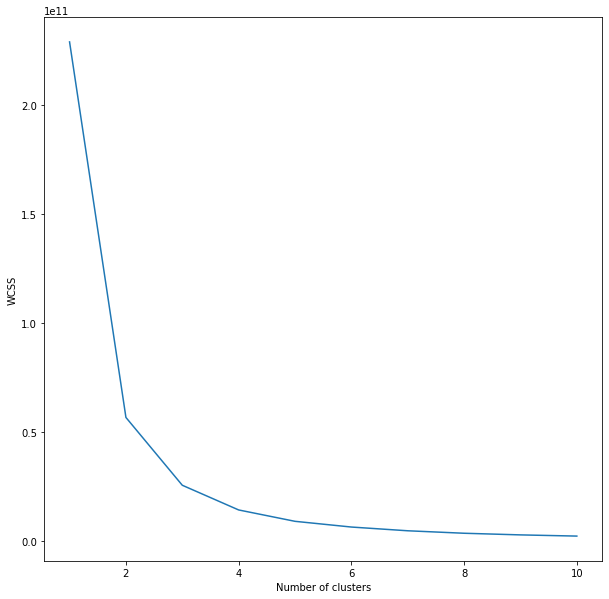

In [1]:
#lets look at k-means 
#finding appropriate number of clusters 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
%matplotlib inline 

history = pd.read_csv("user_history.csv")#.drop(['USER ID'],axis=1)
user_history=history
user_ratings = pd.read_csv("user_ratings.csv")
user_ratings_table = pd.pivot_table(user_ratings,values='RATING', index='USER ID',
                    columns='PRODUCT')
#using elbow method to find optimal number of clusters to partition history data
#kmeans = KMeans(n_clusters=2, random_state=0).fit(history)
wcss = []
for i in range(1,11):
    kmodel = KMeans(n_clusters = i, init = "k-means++")
    kmodel.fit(history)
    wcss.append(kmodel.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From graph we can see that the optimal number of clusters to partition the history data is 3. 



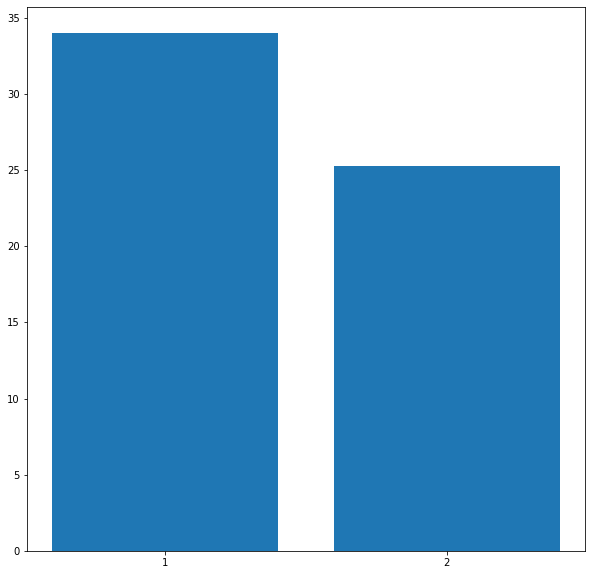

[2 0 1 ... 2 1 1]


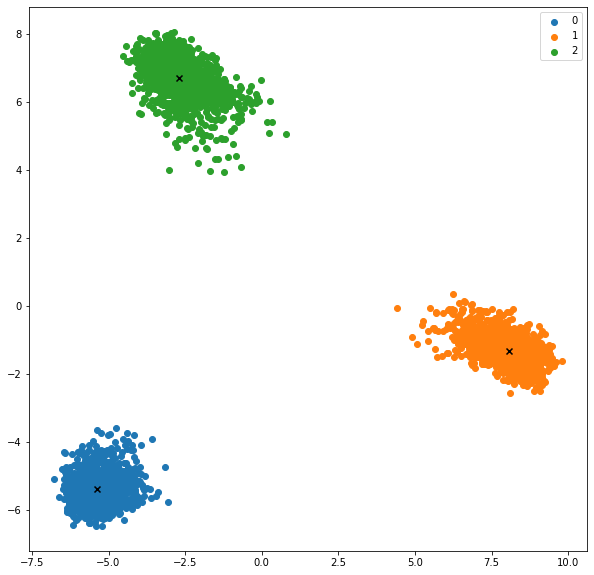

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
#change data into 2-dimensions
pca = PCA(2)
history = StandardScaler().fit_transform(history)
data = pca.fit_transform(history)

#check variance of components 
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

#train k means and pca
kmeans = cluster.KMeans(3)
kmeans.fit(data)
centers = np.array(kmeans.cluster_centers_)
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(data)
print(label)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    #print(len(data[label == i , 0] ))
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
#plt.set_title('PCA', fontsize = 20)
plt.show()

In [3]:
all_data=pd.merge(user_history,user_ratings_table,right_index=True,left_on='USER ID',how='outer' )
all_data['cluster']=label
cluster_0=all_data[all_data['cluster']==0]
cluster_1=all_data[all_data['cluster']==1]
cluster_2=all_data[all_data['cluster']==2]
print(cluster_0)

      USER ID  alpine kimono  sweden kansas  student icon  supreme ivan  \
1      100956       2.776597       0.788821      1.187149      0.473049   
5      100978       1.375428       0.078033      1.542969      0.941914   
6      100982       1.918573       0.285344      2.282530      0.063600   
7      100986       2.126462       1.275476      2.479736      0.145961   
11     101014       2.658253       0.458603      1.330847      0.999031   
...       ...            ...            ...           ...           ...   
4483   125542       1.647771       0.105271      1.062200      0.979237   
4488   125570       1.203968       0.220076      0.664350      0.829669   
4493   125600       2.342761       0.486882      1.948989      0.244021   
4494   125610       2.551606       0.645475      0.677336      0.816819   
4496   125622       1.139876       0.361305      1.420300      1.024918   

      albert charlie  heavy trapeze  fabric tokyo  brother robin  \
1           2.245112       1.99

In [4]:
#cov_matrix = np.cov(history)
#eigen_val = np.linalg.eig(cov_matrix)
from sklearn.linear_model import LinearRegression
#table of principle components 
his_pca = pd.DataFrame(data = data, columns = ['principal component 1', 'principal component 2'])
#print(his_pca)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#choose pc 1 as features since have higher variance ratio
features = np.zeros((4500, 75))
features[: , 0] = his_pca.iloc[:, 1]
user_ratings = pd.read_csv("user_ratings.csv")
user_ratings_table = pd.pivot_table(user_ratings,values='RATING', index=['USER ID'], columns='PRODUCT')
#print(user_ratings_table)
#mn = user_ratings_table[1:]
#print(mn)


Explained variation per principal component: [0.33984813 0.25309902]


In [5]:
print(features)

[[ 7.00005819  0.          0.         ...  0.          0.
   0.        ]
 [-5.07811923  0.          0.         ...  0.          0.
   0.        ]
 [-1.49607     0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 7.49343943  0.          0.         ...  0.          0.
   0.        ]
 [-1.26742023  0.          0.         ...  0.          0.
   0.        ]
 [-0.59241926  0.          0.         ...  0.          0.
   0.        ]]


In [6]:
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

#X = features
#Y = user_ratings_table
#Y = Y.replace(np.nan,0) 

#X_train,X_test,y_train,y_test=train_test_split(user_history, user_ratings_table,test_size=0.2,random_state=0)

z = np.empty((1500, 75)) #create 
z[:]=np.nan
#Y = np.concatenate((z,Y))
#print(Y)


# Performing Gradient Descent 
X=cluster_0.iloc[:,1:101].values
Y=cluster_0.iloc[:,101:176].values
print(X.shape)
print(Y.shape)

n = float(len(X)) # Number of elements in X
for i in range(epochs): 
    if(Y.all() != np.nan):
        Y_pred = m*X + c  # The current predicted value of Y
        D_m = (-2/n) * np.sum(X * (Y - Y_pred))  # Derivative wrt m
        D_c = (-2/n) * np.sum(Y - Y_pred)  # Derivative wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c

# Making predictions
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression()
#reg.fit(X, Y_pred)
#reg.score(X, Y)

Y_pred = m*X + c
print(Y_pred)
plt.scatter(X, Y) 
#plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

(1500, 100)
(1500, 75)


ValueError: operands could not be broadcast together with shapes (1500,75) (1500,100) 

In [7]:
products=user_ratings_table.columns
print(products)
print(products[0])

Index(['adrian crater', 'anagram mentor', 'apropos pizza', 'bandit anatomy',
       'banjo ladder', 'barcode arnold', 'bazooka diagram', 'bronze mystic',
       'calypso zigzag', 'casino unit', 'civil book', 'company polo',
       'conan antenna', 'current pony', 'diploma moment', 'distant list',
       'evita soviet', 'forum bravo', 'front salami', 'garden jimmy',
       'helium exact', 'horizon norway', 'house vodka', 'image jessica',
       'imagine disco', 'inch fragile', 'june monica', 'kayak analog',
       'kitchen active', 'lobster diana', 'lotus sherman', 'meteor slalom',
       'meter sigma', 'mexico stretch', 'motor modular', 'nina sailor',
       'ninja history', 'optimal recycle', 'oregano option', 'oxford open',
       'panic inside', 'pepper chicago', 'peru king', 'picnic locate',
       'popcorn shannon', 'premium bread', 'process volume', 'risk corona',
       'ritual product', 'sabine danube', 'saint desert', 'salsa impress',
       'salute joshua', 'scale nepal', 'se

In [14]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
cluster_0_predict=[]
ID=cluster_0['USER ID']
df0=pd.DataFrame(ID)
for i in range(101,176):
    product=products[i-101]
    X=cluster_0.iloc[:,0:101]
    Y=cluster_0.iloc[:,[0,i]]
    Y=Y[~Y.iloc[:,1].isna()]
    data=pd.merge(X,Y,how='inner')
    feature=data.iloc[:,1:101]
    target=data.iloc[:,-1]
    reg.fit(feature, target)
    features=cluster_0.iloc[:,1:101]
    prediction=reg.predict(features)
    cluster_0_predict.append(prediction)
    df0[product]=prediction
print(df0)

cluster_1_predict=[]
ID=cluster_1['USER ID']
df1=pd.DataFrame(ID)
for i in range(101,176):
    product=products[i-101]
    X=cluster_1.iloc[:,0:101]
    Y=cluster_1.iloc[:,[0,i]]
    Y=Y[~Y.iloc[:,1].isna()]
    data=pd.merge(X,Y,how='inner')
    feature=data.iloc[:,1:101]
    target=data.iloc[:,-1]
    reg.fit(feature, target)
    features=cluster_1.iloc[:,1:101]
    prediction=reg.predict(features)
    df1[product]=prediction
print(df1)

cluster_1_predict=[]
ID=cluster_1['USER ID']
df2=pd.DataFrame(ID)
for i in range(101,176):
    product=products[i-101]
    X=cluster_2.iloc[:,0:101]
    Y=cluster_2.iloc[:,[0,i]]
    Y=Y[~Y.iloc[:,1].isna()]
    data=pd.merge(X,Y,how='inner')
    feature=data.iloc[:,1:101]
    target=data.iloc[:,-1]
    reg.fit(feature, target)
    features=cluster_2.iloc[:,1:101]
    prediction=reg.predict(features)
    df2[product]=prediction
print(df2)

      USER ID  adrian crater  anagram mentor  apropos pizza  bandit anatomy  \
1      100956       2.457343        5.644964       6.595613       -1.075397   
5      100978       5.016878        5.548576       6.033680        4.963828   
6      100982       8.718377        4.121568       1.864140        3.663124   
7      100986       9.114418        3.889572       2.266192        0.204801   
11     101014       3.405392        5.049510       5.415535        1.069355   
...       ...            ...             ...            ...             ...   
4483   125542       3.877186        5.498481       6.108625        3.646134   
4488   125570       4.420358        5.714049       6.039846       10.717127   
4493   125600       6.671842        4.387242       3.315688       -2.183944   
4494   125610       2.430234        5.690634       5.708092       -0.204468   
4496   125622       6.054716        5.257416       4.514433       10.719246   

      banjo ladder  barcode arnold  bazooka diagram

In [25]:
merged=pd.merge(pd.merge(df0,df1),df2)
merged=pd.merge(pd.merge(df0,df1,how='outer'),df2,how='outer')
print(merged)

      USER ID  adrian crater  anagram mentor  apropos pizza  bandit anatomy  \
0      100956       2.457343        5.644964       6.595613       -1.075397   
1      100978       5.016878        5.548576       6.033680        4.963828   
2      100982       8.718377        4.121568       1.864140        3.663124   
3      100986       9.114418        3.889572       2.266192        0.204801   
4      101014       3.405392        5.049510       5.415535        1.069355   
...       ...            ...             ...            ...             ...   
4495   125562       9.774067       10.855427       1.351937       10.716802   
4496   125574       7.919205        0.650132       1.887085        3.068541   
4497   125614       8.715434       -1.737753       2.054006        2.451722   
4498   125636       1.051057       -1.270254       4.762034        1.592744   
4499   125645       2.079789        3.769268       6.197211        5.088145   

      banjo ladder  barcode arnold  bazooka diagram

In [36]:
print(user_ratings)
pred = np.mean(Y_pred, axis = 1)
#print(pred.T)
rate = pd.DataFrame(pred.T)
print(rate)
rate['USER ID'] = user_ratings['USER ID']
rate['PRODUCT'] = user_ratings['PRODUCT']
rate['RATING'] = np.round_(pred.T, 3)
rate = rate[['USER ID','PRODUCT', 'RATING']]
#nrate = rate.rename(columns={'0': 'RATING'})
print(rate)
rate.to_csv("ratings1.csv")

       USER ID         PRODUCT  RATING
0       100950  secret postage       4
1       100950     violet saga       4
2       100950  pepper chicago       3
3       100950     nina sailor       2
4       100950    front salami       3
...        ...             ...     ...
33720   117449    garden jimmy       4
33721   117449    evita soviet       8
33722   117449   tourist micro       7
33723   117449  diploma moment       7
33724   117449   story respect       7

[33725 rows x 3 columns]
       0
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
...   ..
4495 NaN
4496 NaN
4497 NaN
4498 NaN
4499 NaN

[4500 rows x 1 columns]
      USER ID         PRODUCT  RATING
0      100950  secret postage     NaN
1      100950     violet saga     NaN
2      100950  pepper chicago     NaN
3      100950     nina sailor     NaN
4      100950    front salami     NaN
...       ...             ...     ...
4495   103157    garden jimmy     NaN
4496   103157  bandit anatomy     NaN
4497   103157   lotus sherman  

TypeError: '<' not supported between instances of 'str' and 'float'